<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Final Project</p><br>

Coronavirus COVID19

Import Libraries



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#import warnings
#warnings.filterwarnings("ignore")

In [3]:
#Dataset downloaded from Kaggle.com
df = pd.read_csv('~/Finial_project/covid-19-all.csv', index_col='Date', parse_dates=True)

#Grouped each country with diffrerent either states or provinces
newdf= df.groupby(['Date','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()
df

<ipython-input-3-f22a4d3bcebd>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  newdf= df.groupby(['Date','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()


,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths
Date,,,,,,,
2020-01-22,China,Anhui,31.8257,117.2264,1.0,NaN,NaN
2020-01-22,China,Beijing,40.1824,116.4142,14.0,NaN,NaN
2020-01-22,China,Chongqing,30.0572,107.8740,6.0,NaN,NaN
2020-01-22,China,Fujian,26.0789,117.9874,1.0,NaN,NaN
2020-01-22,China,Gansu,36.0611,103.8343,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-03-21,Jersey,NaN,49.1900,-2.1100,0.0,0.0,0.0
2020-03-21,Puerto Rico,NaN,18.2000,-66.5000,0.0,0.0,0.0
2020-03-21,Congo (Brazzaville),NaN,-1.4400,15.5560,0.0,0.0,0.0


In [4]:
#Define our intented countries:Italy, Iran and UK

df_italy = newdf[:][newdf['Country/Region']=='Italy']
df_iran = newdf[:][newdf['Country/Region']=='Iran']
df_uk = newdf[:][newdf['Country/Region']=='United Kingdom']



In [5]:
#Define growth rate and death rate for Italy, Iran and UK


df_italy["Current Case"]=df_italy["Confirmed"]-df_italy["Deaths"]-df_italy["Recovered"]
df_iran["Current Case"] =df_iran["Confirmed"] -df_iran["Deaths"] -df_iran["Recovered"]
df_uk["Current Case"]=df_uk["Confirmed"]-df_uk["Deaths"]-df_uk["Recovered"]

df_italy["growth"]=df_italy["Current Case"]/df_italy["Current Case"].shift(+1)
df_iran["growth"]=df_iran["Current Case"]/df_iran["Current Case"].shift(+1)
df_uk["growth"]=df_uk["Current Case"]/df_uk["Current Case"].shift(+1)

df_italy["death rate"]=df_italy["Deaths"]/df_italy["Confirmed"]
df_iran["death rate"]=df_iran["Deaths"]/df_iran["Confirmed"]
df_uk["death rate"]=df_uk["Deaths"]/df_uk["Confirmed"]

italy_growth = df_italy[["Date","growth"]]
iran_growth = df_iran[["Date","growth"]]
uk_growth = df_uk[["Date","growth"]]

italy_death = df_italy[["Date","death rate"]]
iran_death = df_iran[["Date","death rate"]]
uk_death = df_uk[["Date","death rate"]]


df_iran

,Date,Country/Region,Confirmed,Deaths,Recovered,Current Case,growth,death rate
697,2020-02-19,Iran,2.0,2.0,0.0,0.0,NaN,1.000000
728,2020-02-20,Iran,5.0,2.0,0.0,3.0,inf,0.400000
759,2020-02-21,Iran,18.0,4.0,0.0,14.0,4.666667,0.222222
792,2020-02-22,Iran,28.0,5.0,0.0,23.0,1.642857,0.178571
825,2020-02-23,Iran,43.0,8.0,0.0,35.0,1.521739,0.186047
861,2020-02-24,Iran,61.0,12.0,0.0,49.0,1.400000,0.196721
902,2020-02-25,Iran,95.0,16.0,0.0,79.0,1.612245,0.168421
947,2020-02-26,Iran,139.0,19.0,49.0,71.0,0.898734,0.136691
998,2020-02-27,Iran,245.0,26.0,49.0,170.0,2.394366,0.106122
1054,2020-02-28,Iran,388.0,34.0,73.0,281.0,1.652941,0.087629


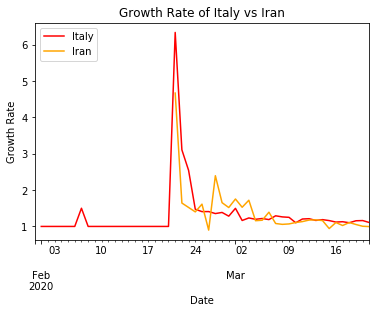

In [51]:
#plotting the diagram for growth rate
#Italy vs Iran
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

ax=italy_growth.plot(kind='line',x='Date',y='growth',color='red')
y=iran_growth.plot(kind='line',x='Date',y='growth',color='orange',ax=ax)
plt.legend(('Italy', 'Iran',),    loc='upper left')
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Growth Rate of Italy vs Iran")
plt.show()
y.figure.savefig('file1.pdf')






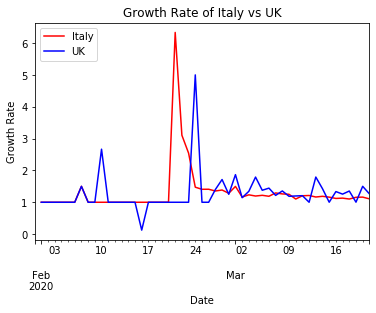

In [49]:
#plotting the diagram for growth rate
#Italy vs UK
ax=italy_growth.plot(kind='line',x='Date',y='growth',color='red')
y=uk_growth.plot(kind='line',x='Date',y='growth',color='blue',ax=ax)
plt.legend(('Italy', 'UK'),    loc='upper left')
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Growth Rate of Italy vs UK")
plt.show()
y.figure.savefig('growthukItaly.pdf')


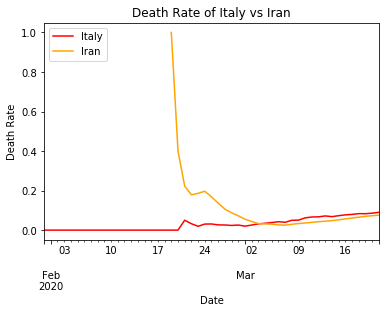

In [50]:
#plotting the diagram for death rate
#Iran vs Italy 
ax = plt.gca()
italy_death.plot(kind='line',x='Date',y='death rate',color='red',ax=ax)
y=iran_death.plot(kind='line',x='Date',y='death rate',color='orange',ax=ax)
plt.legend(('Italy', 'Iran'),    loc='upper left')
plt.ylabel("Death Rate")
plt.xlabel("Date")
plt.title("Death Rate of Italy vs Iran")
y.figure.savefig('deathiranItaly.pdf')
plt.show()



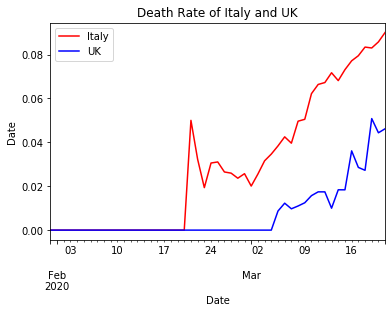

In [9]:
#plotting the diagram for death rate
#UK vs Italy 
ax=italy_death.plot(kind='line',x='Date',y='death rate',color='red')
y=uk_death.plot(kind='line',x='Date',y='death rate',color='blue',ax=ax)
plt.legend(('Italy', 'UK'),    loc='upper left')
plt.ylabel("Death Rate")
plt.xlabel("Date")
plt.title("Death Rate of Italy and UK")
y.figure.savefig('deathukItaly.pdf')

plt.show()

In [10]:
#Preparing the data for Regression
#Italy
df_italy= df_italy.dropna()
df_italy['Day Number'] = range(1,df_italy.shape[0]+1)
#df_italy
X = df_italy.iloc[:, 8].values
X =X.reshape(-1,1)
y = df_italy.iloc[:, 6:7].values
y =y.reshape(-1,1)



In [11]:
# Fitting Linear Regression to the dataset 
#Italy

from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#calculating RMSE for linear regression
#Italy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
y_prediction = lin.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.215646476603325


In [13]:
# Fitting Polynomial Regression to the dataset 
#Italy

from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y,) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#calculating RMSE for polynomial regression
#Italy

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33)
y_prediction = lin2.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.3818304846622838


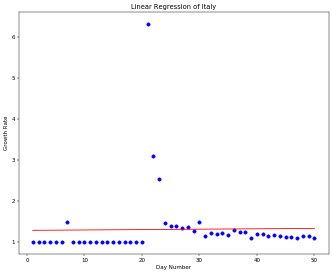

In [15]:
# Visualising the Linear Regression results
#Italy

fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression of Italy') 
plt.xlabel('Day Number') 
plt.ylabel('Growth Rate') 
plt.show() 
ax1.figure.savefig('linregitaly.pdf')


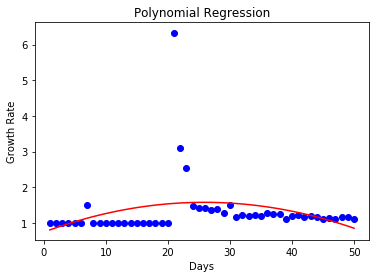

In [16]:
# Visualising the Polynomial Regression results 
#Italy
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days') 
plt.ylabel('Growth Rate') 
  
plt.show()

In [17]:
#Prediction for the next 10 days
#Italy
df_italy_prediction = df_italy[['growth','Day Number']]

predict = pd.DataFrame({'growth': [lin.predict(np.array([31]).reshape(-1,1))], 'Day Number': [31]})  
for i in range (51,61):
    df_italy_prediction = df_italy_prediction.append({'Day Number': i,'growth': float(lin.predict(np.array([i]).reshape(-1,1)))
}, ignore_index=True)



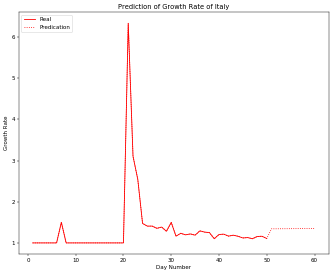

In [18]:
# Visualising the predictoin
#Italy
dff=df_italy[['growth','Day Number']]
dfff=df_italy_prediction
fig = plt.figure(figsize=(10, 8), dpi=40)
ax = plt.gca()
dff.plot(kind='line',x='Day Number',y='growth',color='red',ax=ax)
dfff.plot(linestyle='dotted',x='Day Number',y='growth',color='red',ax=ax)
plt.legend(('Real', 'Predication'),    loc='upper left')
plt.xlabel("Day Number")
plt.ylabel("Growth Rate")
plt.title("Prediction of Growth Rate of Italy")
ax.figure.savefig('PredItaly.pdf')
plt.show()

In [19]:
#Preparing the data for Regression
#UK
df_uk= df_uk.dropna()
df_uk['Day Number'] = range(1,df_uk.shape[0]+1)
#df_italy
X = df_uk.iloc[:, 8].values
X =X.reshape(-1,1)
y = df_uk.iloc[:, 6:7].values
y =y.reshape(-1,1)

In [20]:
# Fitting Linear Regression to the dataset 
#UK
lin = LinearRegression() 
lin.fit(X, y)
poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y,) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

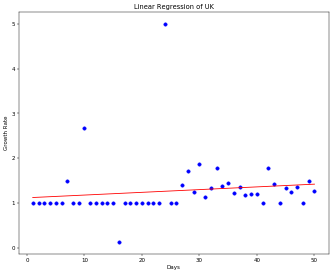

In [21]:
# Visualising the Linear Regression results
#UK
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)

plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression of UK') 
plt.xlabel('Days') 
plt.ylabel('Growth Rate') 
  
plt.show() 
ax1.figure.savefig('linreguk.pdf')


In [22]:
#calculating RMSE for linear regression
#UK

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
y_prediction = lin.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.42381694513285


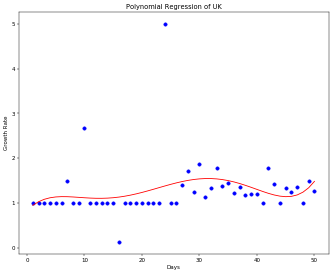

In [23]:
# Visualising the Polynomial Regression results 
#UK
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression of UK') 
plt.xlabel('Days') 
plt.ylabel('Growth Rate') 
  
plt.show()
ax1.figure.savefig('polyreguk.pdf')


In [24]:
#calculating RMSE for polynomial regression
#UK

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33)
y_prediction = lin2.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.9367164299655235


In [25]:
len(df_uk)

50

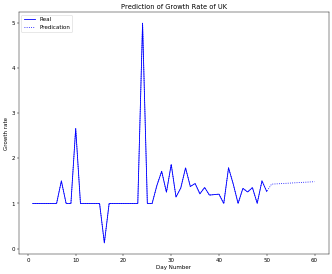

In [26]:
#Prediction for the next 10 days
# Visualising the predictoin
#UK
df_uk_prediction = df_uk[['growth','Day Number']]

for i in range (51,61):
    df_uk_prediction = df_uk_prediction.append({'Day Number': i,'growth': float(lin.predict(np.array([i]).reshape(-1,1)))
}, ignore_index=True)
    
dff=df_uk[['growth','Day Number']]
dfff=df_uk_prediction
fig = plt.figure(figsize=(10, 8), dpi=40)
ax = plt.gca()

dff.plot(kind='line',x='Day Number',y='growth',color='blue',ax=ax)
dfff.plot(linestyle='dotted',x='Day Number',y='growth',color='blue',ax=ax)
plt.legend(('Real', 'Predication'),    loc='upper left')
plt.ylabel("Growth rate")
plt.xlabel("Day Number")
plt.title("Prediction of Growth Rate of UK")
ax.figure.savefig('Preduk.pdf')
plt.show()


In [27]:
#Preparing the data for Regression
#Iran
df_iran= df_iran.drop([728]).dropna()
df_iran['Day Number'] = range(1,df_iran.shape[0]+1)

X = df_iran.iloc[:, 8].values
X =X.reshape(-1,1)
y = df_iran.iloc[:, 6:7].values
y =y.reshape(-1,1)




In [28]:
# Fitting Linear Regression to the dataset 
#Iran
liniran = LinearRegression() 
liniran.fit(X, y)
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y,) 
liniranpoly = LinearRegression() 
liniranpoly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

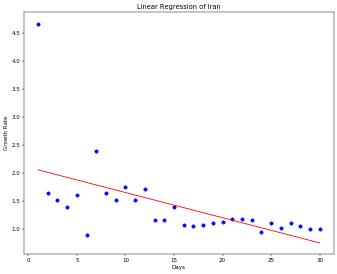

In [29]:
# Visualising the linear Regression results 
#Iran
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)

plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, liniran.predict(X), color = 'red') 
plt.title('Linear Regression of Iran') 
plt.xlabel('Days') 
plt.ylabel('Growth Rate') 
  
plt.show()
ax1.figure.savefig('iranregiran.pdf')


In [30]:
#Calculating RMSE for linear regression
#Iran

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
y_prediction = liniran.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.8677737731599435


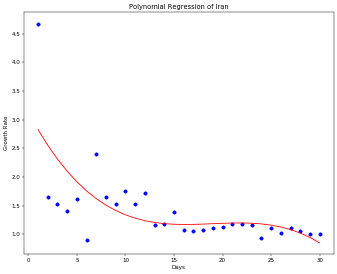

In [31]:
# Visualising the Polynomial Regression results 
#Iran
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, liniranpoly.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression of Iran') 
plt.xlabel('Days') 
plt.ylabel('Growth Rate') 
  
plt.show()
ax1.figure.savefig('polyregiran.pdf')


In [32]:
#Calculating RMSE for linear regression
#Iran

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33)
y_prediction = liniranpoly.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)


0.3563303923792662


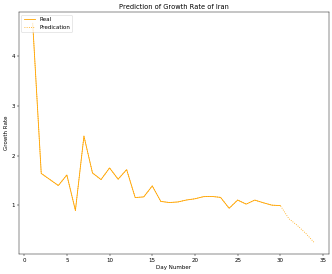

In [33]:
#Prediction for the next 10 days
# Visualising the predictoin
#Iran
df_iran_prediction = df_iran[['growth','Day Number']]

for i in range (31,35):
    df_iran_prediction = df_iran_prediction.append({'Day Number': i,'growth': float(liniranpoly.predict(poly.fit_transform(np.array([i]).reshape(-1,1))))
}, ignore_index=True)
    
dff=df_iran[['growth','Day Number']]
dfff=df_iran_prediction
fig = plt.figure(figsize=(10, 8), dpi=40)
ax = plt.gca()

dff.plot(kind='line',x='Day Number',y='growth',color='orange',ax=ax)
dfff.plot(linestyle='dotted',x='Day Number',y='growth',color='orange',ax=ax)
plt.legend(('Real', 'Predication'),    loc='upper left')
plt.ylabel("Growth Rate")
plt.xlabel("Day Number")
plt.title("Prediction of Growth Rate of Iran")
ax.figure.savefig('PredIran.pdf')
plt.show()

In [34]:
#Regression of death rate
#Italy
df_italy = df_italy.iloc[20:]
X = df_italy.iloc[:, 8].values
X =X.reshape(-1,1)
y = df_italy.iloc[:, 7:8].values
y =y.reshape(-1,1)
lin = LinearRegression() 
  
lin.fit(X, y) 
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y,) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

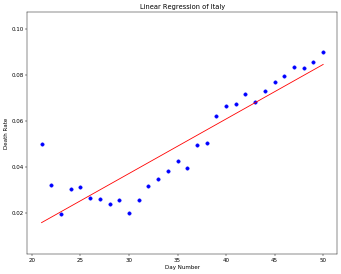

In [35]:
#visiulaizing the Linear Regression
#Italy
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)

plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression of Italy') 
plt.xlabel('Day Number') 
plt.ylabel('Death Rate') 
  
plt.show()
ax1.figure.savefig('linregdeathitaly.pdf')


In [36]:
#Calulating the RMSE for linear regression
#Italy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
y_prediction = lin.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.006553518622767802


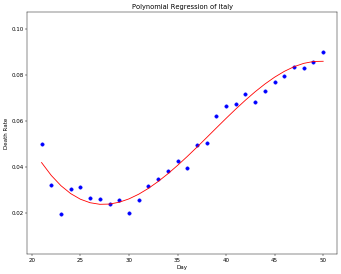

In [37]:
# Visualising the Polynomial Regression results 
#Italy
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression of Italy') 
plt.xlabel('Day') 
plt.ylabel('Death Rate') 
  
plt.show()
ax1.figure.savefig('polyregdeathitaly.pdf')


In [38]:
#Calculating RMSE for Polynomial Regression
#Italy
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33)
y_prediction = lin2.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, y_prediction))
print(RMSE)

0.004241694180328835


In [39]:
#Regression of death rate
#Iran
X = df_iran.iloc[:, 8].values
X =X.reshape(-1,1)
y = df_iran.iloc[:, 7:8].values
y =y.reshape(-1,1)
lin = LinearRegression() 
  
lin.fit(X, y) 
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y,) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

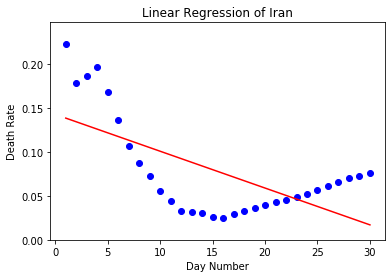

In [40]:
# Visualising the Linear Regression results 
#Iran
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression of Iran') 
plt.xlabel('Day Number') 
plt.ylabel('Death Rate') 
  
plt.show()

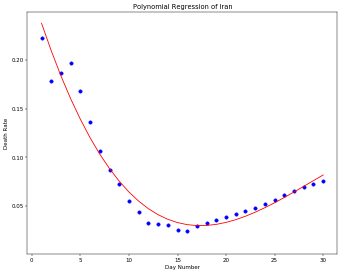

In [41]:
# Visualising the Polynomial Regression results 
#Iran
fig = plt.figure(figsize=(10, 8), dpi=40)
ax1 = fig.add_subplot(111)
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression of Iran') 
plt.xlabel('Day Number') 
plt.ylabel('Death Rate') 
  
plt.show()
ax1.figure.savefig('polyregdeathiran.pdf')


In [42]:
df_uk.head(33)

,Date,Country/Region,Confirmed,Deaths,Recovered,Current Case,growth,death rate,Day Number
193,2020-02-01,United Kingdom,2.0,0.0,0.0,2.0,1.000000,0.0,1
220,2020-02-02,United Kingdom,2.0,0.0,0.0,2.0,1.000000,0.0,2
247,2020-02-03,United Kingdom,2.0,0.0,0.0,2.0,1.000000,0.0,3
275,2020-02-04,United Kingdom,2.0,0.0,0.0,2.0,1.000000,0.0,4
303,2020-02-05,United Kingdom,2.0,0.0,0.0,2.0,1.000000,0.0,5
331,2020-02-06,United Kingdom,2.0,0.0,0.0,2.0,1.000000,0.0,6
360,2020-02-07,United Kingdom,3.0,0.0,0.0,3.0,1.500000,0.0,7
389,2020-02-08,United Kingdom,3.0,0.0,0.0,3.0,1.000000,0.0,8
418,2020-02-09,United Kingdom,3.0,0.0,0.0,3.0,1.000000,0.0,9
447,2020-02-10,United Kingdom,8.0,0.0,0.0,8.0,2.666667,0.0,10


In [43]:
#Removing the 32 first rowa from the dataset.
df_uk = df_uk.iloc[32:]


In [44]:
#Calculating RMSE for Polynomial Regression
#UK
X = df_uk.iloc[:, 8].values
X =X.reshape(-1,1)
y = df_uk.iloc[:, 7:8].values
y =y.reshape(-1,1)
lin = LinearRegression() 
  
lin.fit(X, y) 
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y,) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

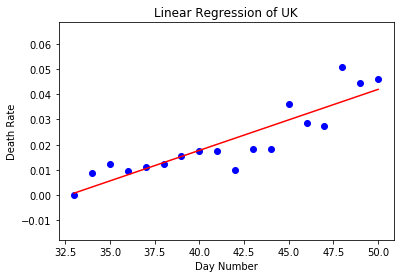

In [45]:
# Visualising the Linear Regression results 
#UK
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression of UK') 
plt.xlabel('Day Number') 
plt.ylabel('Death Rate') 
  
plt.show()

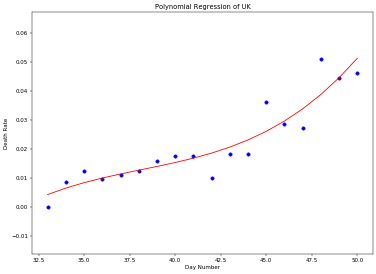

In [46]:
# Visualising the Polynomial Regression results 
#UK
fig = plt.figure(figsize=(11, 8), dpi=40)
ax1 = fig.add_subplot(111)
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression of UK') 
plt.xlabel('Day Number') 
plt.ylabel('Death Rate') 
  
plt.show()
ax1.figure.savefig('polyregdeathuk.pdf')
